In [3]:
import bt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import io
#matplotlib.style.use('ggplot')
%matplotlib inline  

In [5]:
bloom = pd.read_csv("~/quantfinance/BLOOM.csv")
plc = pd.read_csv("~/quantfinance/PLC.csv")
bloom_d = bloom.set_index('Date')
plc_d = plc.set_index('Date')
bloom_d.head()
plc_d.head()


,Open,High,Low,Close,Volume
Date,,,,,
2012-01-02,0.340,0.340,0.340,0.340,1010000
2012-01-03,0.340,0.340,0.340,0.340,1340000
2012-01-04,0.340,0.345,0.340,0.345,1610000
2012-01-05,0.350,0.350,0.345,0.350,1110000
2012-01-06,0.355,0.360,0.355,0.355,3270000


In [6]:
#df = pd.concat({'BLOOM' : bloom_d['Close'], 'PLC' : plc_d['Close']})
df = pd.DataFrame(dict(BLOOM = bloom_d['Close'], PLC = plc_d['Close'])).dropna()
df.index = pd.to_datetime(df.index)
df.tail()

,BLOOM,PLC
2017-09-21,10.82,1.61
2017-09-22,10.50,1.61
2017-09-25,10.32,1.59
2017-09-26,10.80,1.60
2017-09-27,10.42,1.59


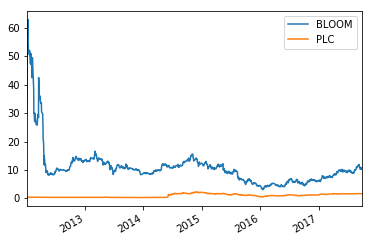

In [7]:
df.plot()

In [8]:
s = bt.Strategy('s1', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

In [9]:
# create a backtest and run it
test = bt.Backtest(s, df)
res = bt.run(test)

s1
0% [############################# ] 100% | ETA: 00:00:00

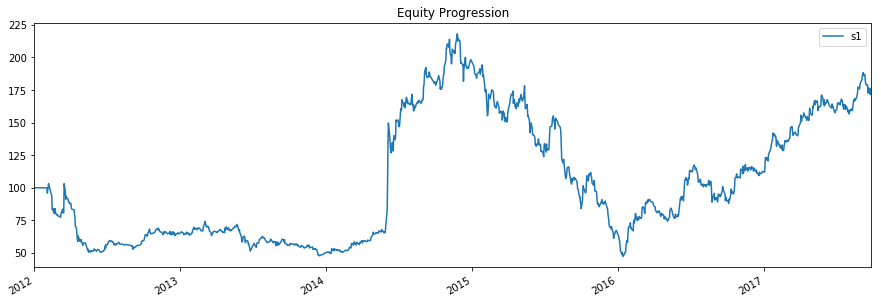

In [10]:
# first let's see an equity curve
res.plot()

In [11]:
#basic stats
res.display()

Stat                 s1
-------------------  ----------
Start                2012-01-01
End                  2017-09-27
Risk-free rate       0.00%

Total Return         72.29%
Daily Sharpe         0.45
Daily Sortino        0.77
CAGR                 9.94%
Max Drawdown         -78.28%
Calmar Ratio         0.13

MTD                  -4.46%
3m                   8.75%
6m                   23.26%
YTD                  53.24%
1Y                   91.34%
3Y (ann.)            -1.49%
5Y (ann.)            23.81%
10Y (ann.)           9.94%
Since Incep. (ann.)  9.94%

Daily Sharpe         0.45
Daily Sortino        0.77
Daily Mean (ann.)    20.82%
Daily Vol (ann.)     46.43%
Daily Skew           2.55
Daily Kurt           23.54
Best Day             29.56%
Worst Day            -10.96%

Monthly Sharpe       0.39
Monthly Sortino      0.99
Monthly Mean (ann.)  27.70%
Monthly Vol (ann.)   70.73%
Monthly Skew         3.87
Monthly Kurt         24.10
Best Month           132.00%
Worst Month          -31.26%



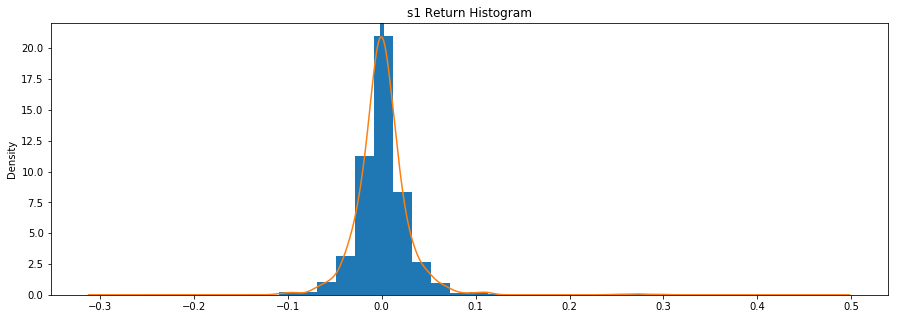

In [12]:
res.plot_histogram()

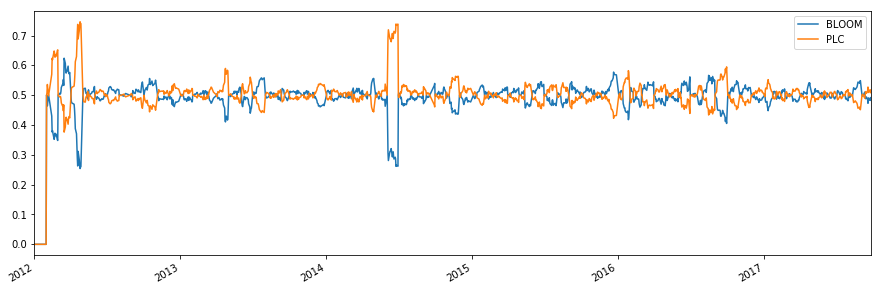

In [13]:
# and just to make sure everything went along as planned, let's plot the security weights over time
res.plot_security_weights()